In [122]:
include("PVCR.jl");

# Residential cases

## Residential Case 1: Small PV System, this doesn't generate any injection into the grid

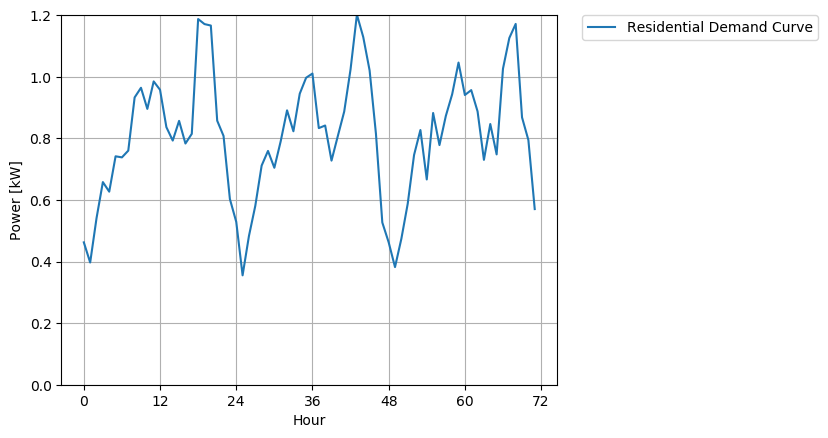

In [123]:
PVRes.capacity = 1.0
ts=simulate(residential, PVRes, 3);
plot(ts["demand_curve"], label = "Residential Demand Curve")
legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
xlabel("Hour")
ylim(0,1.2)
ylabel("Power [kW]")
grid("on")
xticks([0,12,24,36,48,60,72]);

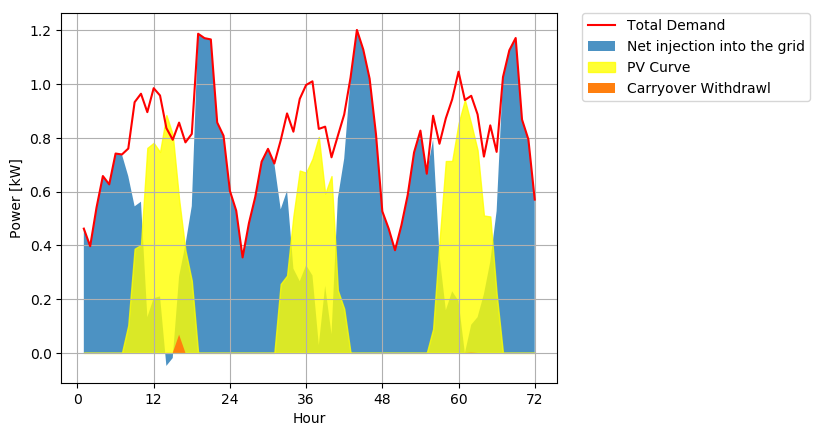

In [124]:
hours = 1:72
fill_between(hours, ts["inyection_grid_h"], label = "Net injection into the grid", alpha = 0.8)
fill_between(hours, ts["pv_curve"], label = "PV Curve", alpha = 0.8, color="yellow")
fill_between(hours, ts["withdrawl_h"],  label = "Carryover Withdrawl")
plot(hours, ts["demand_curve"], label = "Total Demand", color = "red")
legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
xlabel("Hour")
ylabel("Power [kW]")
grid("on")
xticks([0,12,24,36,48,60,72]);

### Energy Balance for case residential 1

In [125]:
ebalance = annual_energy_balance(residential, PVRes, print_output=true);

month consumer_energy PV_energy  | inyection_grid withdrawn_energy grid_energy  | global_generation global_withdrawl global_allowance max_surplus carryover 
1 595.94 181.25  | 0.01 0.01 414.69  | 181.25 0.01 88.81 88.8 0.0 
2 597.09 136.43  | 0.0 0.0 460.66  | 317.68 0.01 155.66 155.65 0.0 
3 602.35 156.93  | 0.0 0.0 445.42  | 474.61 0.01 232.56 232.55 0.0 
4 592.38 165.76  | 0.0 0.0 426.62  | 640.37 0.01 313.78 313.77 0.0 
5 604.73 170.83  | 0.0 0.0 433.9  | 811.2 0.01 397.49 397.48 0.0 
6 609.06 162.12  | 0.0 0.0 446.94  | 973.33 0.01 476.93 476.92 0.0 
7 584.31 152.54  | 0.0 0.0 431.77  | 1125.87 0.01 551.67 551.66 0.0 
8 595.43 177.91  | 0.02 0.02 417.52  | 1303.78 0.03 638.85 638.82 0.0 
9 585.2 166.9  | 0.0 0.0 418.31  | 1470.68 0.03 720.63 720.6 0.0 
10 608.62 172.17  | 0.0 0.0 436.45  | 1642.84 0.03 804.99 804.96 0.0 
11 607.9 161.04  | 0.0 0.0 446.85  | 1803.89 0.03 883.9 883.87 0.0 
12 612.01 171.37  | 0.0 0.0 440.64  | 1975.26 0.03 967.88 967.84 0.0 


### Billings case residential 1

In [126]:
bills_residential = Dict()
println("grid_cost"," ","withdrawn_energy_cost"," ", "total_cost", " | ", "counterfactual_cost", " ", "savings")
for m in 1:12
    bills_residential[m] = monthly_bill(ebalance[m], residential, print_output=true)
end

grid_cost withdrawn_energy_cost total_cost | counterfactual_cost savings
53172.22 0.28 62471.02  | 83934.29 21463.27
57775.06 0.0 67913.79  | 84070.36 16156.57
56248.99 0.0 66109.13  | 84693.15 18584.02
54366.63 0.0 63883.15  | 83512.11 19628.97
55095.34 0.0 64744.87  | 84974.84 20229.97
56401.15 0.0 66289.07  | 85487.93 19198.86
54882.82 0.0 64493.56  | 82557.34 18063.78
53454.97 0.43 62805.56  | 83873.84 21068.28
53534.08 0.0 62898.61  | 82662.49 19763.88
55351.12 0.0 65047.35  | 85435.39 20388.04
56392.76 0.0 66279.14  | 85350.15 19071.01
55770.72 0.0 65543.55  | 85837.78 20294.23


## Residential Case 2: Medium Size PV System, produces some injection into the grid 

In [127]:
PVRes.capacity = 2.0
ts=simulate(residential, PVRes, 3);

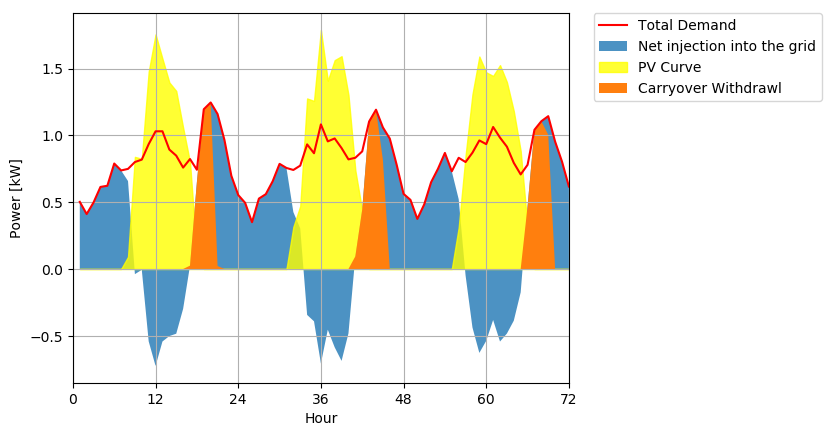

In [128]:
hours = 1:72
fill_between(hours, ts["inyection_grid_h"], label = "Net injection into the grid", alpha = 0.8)
fill_between(hours, ts["pv_curve"], label = "PV Curve", alpha = 0.8, color="yellow")
fill_between(hours, ts["withdrawl_h"],  label = "Carryover Withdrawl")
plot(hours, ts["demand_curve"], label = "Total Demand", color = "red")
legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
xlabel("Hour")
xlim(1,72)
ylabel("Power [kW]")
grid("on")
xticks([0,12,24,36,48,60,72]);

### Energy Balance for case residential 2

In [129]:
ebalance = annual_energy_balance(residential, PVRes, print_output=true);

month consumer_energy PV_energy  | inyection_grid withdrawn_energy grid_energy  | global_generation global_withdrawl global_allowance max_surplus carryover 
1 595.29 398.2  | 129.67 129.67 197.08  | 398.2 129.67 195.12 65.45 0.0 
2 592.88 286.94  | 65.69 65.69 305.94  | 685.14 195.36 335.72 140.36 0.0 
3 602.46 299.11  | 70.76 70.76 303.35  | 984.25 266.11 482.28 216.17 0.0 
4 591.57 337.69  | 92.5 92.5 253.89  | 1321.94 358.62 647.75 289.13 0.0 
5 606.25 351.11  | 100.83 100.83 255.14  | 1673.05 459.45 819.8 360.35 0.0 
6 607.21 319.23  | 62.56 62.56 287.98  | 1992.29 522.01 976.22 454.21 0.0 
7 588.72 342.24  | 94.46 94.46 246.48  | 2334.53 616.47 1143.92 527.45 0.0 
8 597.75 342.51  | 90.86 90.86 255.24  | 2677.04 707.33 1311.75 604.42 0.0 
9 586.01 346.75  | 91.32 91.32 239.26  | 3023.79 798.65 1481.65 683.01 0.0 
10 609.95 346.06  | 80.29 80.29 263.89  | 3369.85 878.93 1651.22 772.29 0.0 
11 606.66 343.72  | 79.82 79.82 262.94  | 3713.57 958.76 1819.65 860.89 0.0 
12 611.32 338.27

### Billings case residential 2

In [130]:
bills_residential = Dict()
println("grid_cost"," ","withdrawn_energy_cost"," ", "total_cost", " | ", "counterfactual_cost", " ", "savings")
for m in 1:12
    bills_residential[m] = monthly_bill(ebalance[m], residential, print_output=true)
end

grid_cost withdrawn_energy_cost total_cost | counterfactual_cost savings
12441.78 2726.95 18198.51  | 83856.72 65658.22
42282.16 1381.42 51228.8  | 83572.06 32343.27
42022.12 1488.01 51047.53  | 84706.06 33658.54
17845.93 1945.32 23673.39  | 83417.16 59743.77
17967.45 2120.53 24024.76  | 85155.46 61130.71
21148.36 1315.71 26836.87  | 85268.87 58432.0
17128.09 1986.53 22872.47  | 83079.29 60206.83
17977.54 1910.69 23788.16  | 84148.86 60360.7
16429.01 1920.41 21966.63  | 82757.81 60791.18
18815.34 1688.44 24516.66  | 85593.79 61077.12
18722.67 1678.66 24395.38  | 85203.64 60808.26
19701.79 1446.72 25279.69  | 85755.36 60475.67


## Residential Case 3: Large PV System that generates multi-day carry over

In [131]:
PVRes.capacity = 4.0
ts=simulate(residential, PVRes, 3);

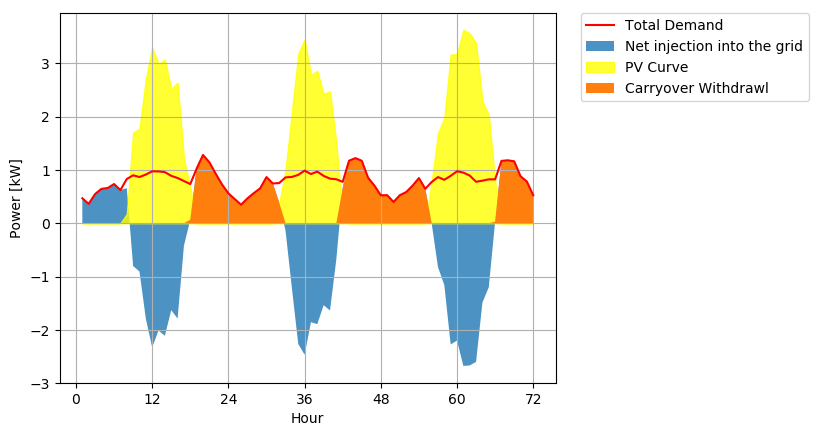

In [132]:
hours = 1:72
fill_between(hours, ts["inyection_grid_h"], label = "Net injection into the grid", alpha = 0.8)
fill_between(hours, ts["pv_curve"], label = "PV Curve", alpha = 0.8, color="yellow")
fill_between(hours, ts["withdrawl_h"],  label = "Carryover Withdrawl")
plot(hours, ts["demand_curve"], label = "Total Demand", color = "red")
legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
xlabel("Hour")
ylabel("Power [kW]")
grid("on")
xticks([0,12,24,36,48,60,72]);

### Energy Balance for case residential 3

In [133]:
ebalance = annual_energy_balance(residential, PVRes, print_output=true);

month consumer_energy PV_energy  | inyection_grid withdrawn_energy grid_energy  | global_generation global_withdrawl global_allowance max_surplus carryover 
1 596.93 731.78  | 439.74 304.9 0.0  | 731.78 304.9 358.57 53.67 53.67 
2 593.85 522.17  | 261.51 314.03 19.17  | 1253.94 618.93 614.43 0.0 0.0 
3 601.43 583.74  | 333.96 330.3 21.34  | 1837.68 949.23 900.46 0.0 0.0 
4 588.73 685.96  | 404.62 307.39 0.0  | 2523.64 1256.62 1236.58 0.0 0.0 
5 602.84 674.32  | 402.15 330.67 0.0  | 3197.96 1587.29 1567.0 0.0 0.0 
6 604.58 741.02  | 444.77 308.34 0.0  | 3938.98 1895.62 1930.1 34.48 34.48 
7 588.49 667.35  | 381.29 302.44 0.0  | 4606.33 2198.06 2257.1 59.04 59.04 
8 596.65 674.22  | 403.62 326.05 0.0  | 5280.55 2524.11 2587.47 63.36 63.36 
9 583.98 661.61  | 396.63 319.0 0.0  | 5942.16 2843.11 2911.66 68.54 68.54 
10 610.12 661.85  | 396.93 345.2 0.0  | 6604.01 3188.32 3235.96 47.65 47.65 
11 608.46 621.51  | 351.0 337.95 0.0  | 7225.52 3526.26 3540.51 14.24 14.24 
12 608.84 701.12  | 41

### Billings case residential 3

In [134]:
bills_residential = Dict()
println("grid_cost"," ","withdrawn_energy_cost"," ", "total_energy_cost", " | ", "counterfactual_cost", " ", "savings")
for m in 1:12
    bills_residential[m] = monthly_bill(ebalance[m], residential, print_output=true)
end

grid_cost withdrawn_energy_cost total_energy_cost | counterfactual_cost savings
0.0 6412.03 7594.44  | 84052.07 76457.63
1210.31 6604.0 9277.93  | 83686.99 74409.05
1347.19 6946.24 9847.96  | 84583.78 74735.82
0.0 6464.38 7656.44  | 83080.38 75423.94
0.0 6953.99 8236.33  | 84751.39 76515.06
0.0 6484.33 7680.07  | 84957.62 77277.56
0.0 6360.24 7533.09  | 83052.5 75519.41
0.0 6856.88 8121.32  | 84018.21 75896.89
0.0 6708.58 7945.68  | 82517.64 74571.97
0.0 7259.61 8598.31  | 85613.66 77015.35
0.0 7106.98 8417.54  | 85416.74 76999.2
0.0 6733.22 7974.86  | 85462.39 77487.53


# Commercial consumer subject to commercial and small size industrial tariff cases

## Commercial case1: small PV system

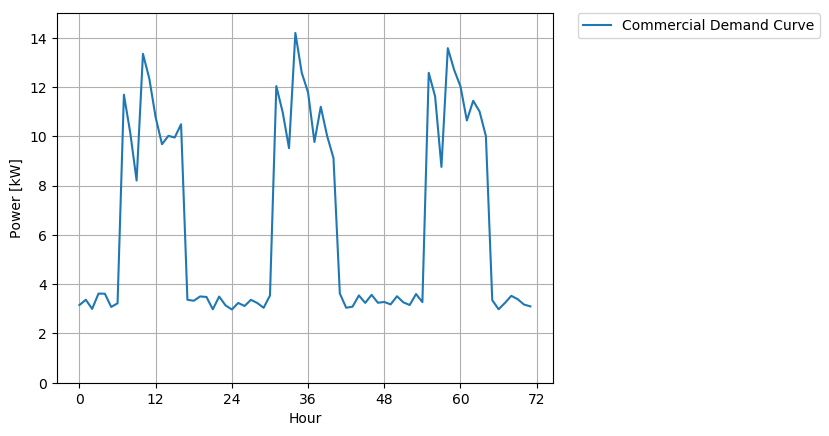

In [135]:
ts=simulate(commercial, PVComInd, 3);
plot(ts["demand_curve"], label = "Commercial Demand Curve")
legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
xlabel("Hour")
ylim(0,15)
ylabel("Power [kW]")
grid("on")
xticks([0,12,24,36,48,60,72]);

In [136]:
mean(commercial.peak_power)

13.847359136480511

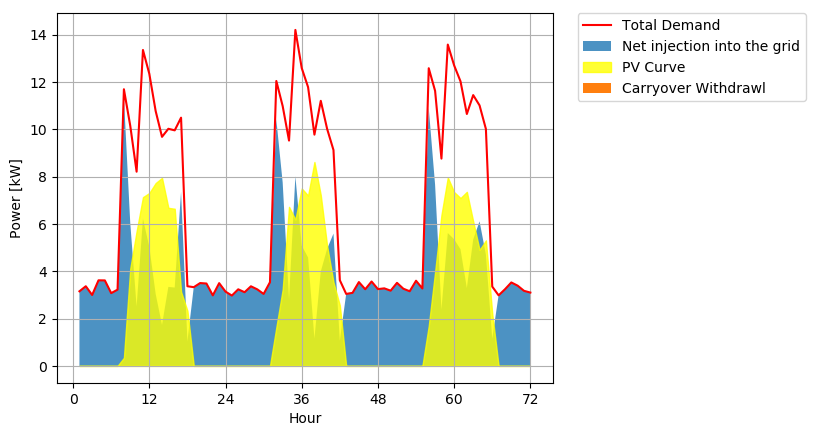

In [137]:
hours = 1:72
fill_between(hours, ts["inyection_grid_h"], label = "Net injection into the grid", alpha = 0.8)
fill_between(hours, ts["pv_curve"], label = "PV Curve", alpha = 0.8, color="yellow")
fill_between(hours, ts["withdrawl_h"],  label = "Carryover Withdrawl")
plot(hours, ts["demand_curve"], label = "Total Demand", color = "red")
legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
xlabel("Hour")
ylabel("Power [kW]")
grid("on")
xticks([0,12,24,36,48,60,72]);

In [138]:
ebalance = annual_energy_balance(commercial, PVComInd, print_output=true);

month consumer_energy PV_energy  | inyection_grid withdrawn_energy grid_energy  | peak_power peak_demand  | global_generation global_withdrawl global_allowance max_surplus carry_over 
1 5013.7 1885.18  | 0.12 0.12 3128.51  | 14.84 10.34  | 1885.18 0.12 923.74 923.62 0.0 
2 5076.94 1455.7  | 0.0 0.0 3621.24  | 16.63 12.59  | 3340.89 0.12 1637.03 1636.92 0.0 
3 4838.76 1517.62  | 0.0 0.0 3321.14  | 14.47 10.84  | 4858.5 0.12 2380.67 2380.55 0.0 
4 5026.18 1844.73  | 0.0 0.0 3181.44  | 15.43 9.69  | 6703.23 0.12 3284.58 3284.47 0.0 
5 5343.89 1605.13  | 0.0 0.0 3738.76  | 15.99 11.04  | 8308.37 0.12 4071.1 4070.98 0.0 
6 5213.02 1708.04  | 0.0 0.0 3504.98  | 16.03 11.14  | 10016.41 0.12 4908.04 4907.92 0.0 
7 4957.12 1678.02  | 0.0 0.0 3279.1  | 14.75 9.61  | 11694.43 0.12 5730.27 5730.15 0.0 
8 5012.13 1825.69  | 0.0 0.0 3186.45  | 14.9 9.89  | 13520.12 0.12 6624.86 6624.74 0.0 
9 4909.39 1617.84  | 0.0 0.0 3291.56  | 14.96 10.71  | 15137.96 0.12 7417.6 7417.48 0.0 
10 4738.55 1770.24  |

In [139]:
bills_commercial = Dict()
println("grid_cost"," ","withdrawn_energy_cost"," ", "total_energy_cost", " ", "total_demand_charges", " | ", 
        "counterfactual_energy_cost", " ", "counterfactual_demand_cost", " ", "counterfactual_cost", " ", " | ", "savings")
for m in 1:12
    bills_commercial[m] = monthly_bill(ebalance[m], commercial, print_output=true)
end

grid_cost withdrawn_energy_cost total_energy_cost total_demand_charges | counterfactual_energy_cost counterfactual_demand_cost counterfactual_cost  | savings
200913.2 2.46 200915.66 103983.72  | 321979.58 149183.36 471162.94  | 214293.44
232556.03 0.0 232556.03 126611.39  | 326041.31 167182.91 493224.22  | 194980.44
213283.89 0.0 213283.89 108932.43  | 310745.22 145433.24 456178.45  | 183710.44
204312.39 0.0 204312.39 97379.94  | 322781.05 155160.43 477941.48  | 217962.59
240102.88 0.0 240102.88 111018.96  | 343184.56 160766.18 503950.74  | 198934.36
225089.81 0.0 225089.81 112020.63  | 334780.26 161179.07 495959.32  | 208843.24
210583.9 0.0 210583.9 96572.45  | 318346.54 148290.89 466637.43  | 199238.32
204633.58 0.0 204633.58 99405.68  | 321879.29 149805.86 471685.16  | 211021.36
211383.67 0.0 211383.67 107663.58  | 315281.13 150416.21 465697.34  | 195700.83
316659.81 0.0 316659.81 0.0  | 304309.71 140209.61 444519.32  | 70733.41
202420.42 0.0 202420.42 99074.21  | 318543.36 149599.8

## Commercial case 2: medium PV system

In [140]:
PVComInd.capacity = 21.0
ts=simulate(commercial, PVComInd, 3);

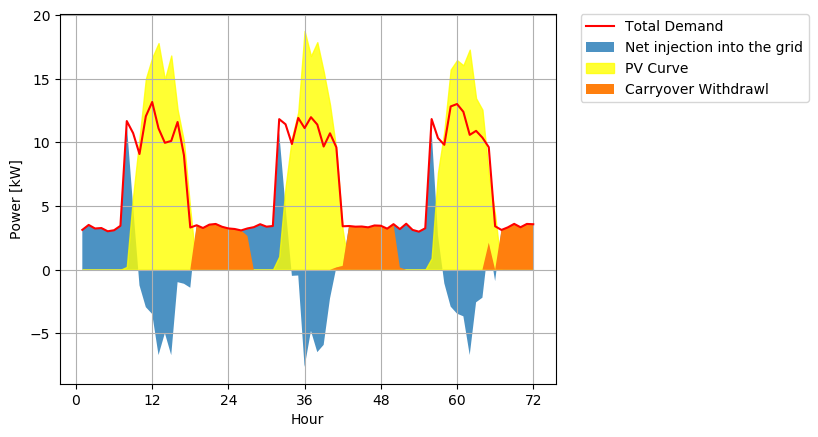

In [141]:
hours = 1:72
fill_between(hours, ts["inyection_grid_h"], label = "Net injection into the grid", alpha = 0.8)
fill_between(hours, ts["pv_curve"], label = "PV Curve", alpha = 0.8, color="yellow")
fill_between(hours, ts["withdrawl_h"],  label = "Carryover Withdrawl")
plot(hours, ts["demand_curve"], label = "Total Demand", color = "red")
legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
xlabel("Hour")
ylabel("Power [kW]")
grid("on")
xticks([0,12,24,36,48,60,72]);

In [142]:
ebalance = annual_energy_balance(commercial, PVComInd, print_output=true);

month consumer_energy PV_energy  | inyection_grid withdrawn_energy grid_energy  | peak_power peak_demand  | global_generation global_withdrawl global_allowance max_surplus carry_over 
1 4991.32 3996.07  | 803.03 803.03 995.25  | 14.88 7.53  | 3996.07 803.03 1958.08 1155.05 0.0 
2 5106.46 3103.09  | 281.34 281.34 2003.37  | 16.69 12.59  | 7099.16 1084.37 3478.59 2394.22 0.0 
3 4850.19 3079.64  | 272.57 272.57 1770.54  | 14.4 10.86  | 10178.81 1356.94 4987.62 3630.68 0.0 
4 5019.37 3539.87  | 456.97 456.97 1479.5  | 15.46 7.23  | 13718.68 1813.91 6722.15 4908.25 0.0 
5 5349.45 3627.93  | 490.76 490.76 1721.51  | 15.89 9.99  | 17346.61 2304.67 8499.84 6195.17 0.0 
6 5223.43 3475.47  | 301.06 301.06 1747.96  | 16.0 10.53  | 20822.08 2605.72 10202.82 7597.09 0.0 
7 4966.39 3519.95  | 487.38 487.38 1446.44  | 14.73 8.81  | 24342.02 3093.1 11927.59 8834.49 0.0 
8 5023.23 3907.64  | 655.35 655.35 1115.59  | 14.98 8.39  | 28249.66 3748.46 13842.33 10093.88 0.0 
9 4919.65 3116.65  | 289.63 289.6

In [143]:
bills_commercial = Dict()
println("grid_cost"," ","withdrawn_energy_cost"," ", "total_energy_cost", " ", "total_demand_charges", " | ", 
        "counterfactual_energy_cost", " ", "counterfactual_demand_cost", " ", "counterfactual_cost", " ", " | ", "savings")
for m in 1:12
    bills_commercial[m] = monthly_bill(ebalance[m], commercial, print_output=true)
end

grid_cost withdrawn_energy_cost total_energy_cost total_demand_charges | counterfactual_energy_cost counterfactual_demand_cost counterfactual_cost  | savings
106172.86 16887.71 123060.58 0.0  | 320542.59 149570.71 470113.31  | 324784.75
213719.23 5916.61 219635.84 0.0  | 327936.71 167822.95 495759.66  | 236477.36
188881.43 5732.08 194613.51 0.0  | 311478.93 144724.34 456203.27  | 226458.13
157833.04 9610.05 167443.08 0.0  | 322343.88 155464.79 477808.67  | 280120.04
183651.14 10320.67 193971.81 0.0  | 343541.37 159757.22 503298.59  | 274292.55
186472.38 6331.25 192803.63 0.0  | 335448.48 160863.13 496311.61  | 268700.46
154306.62 10249.62 164556.24 0.0  | 318941.63 148100.74 467042.37  | 272758.81
119011.4 13782.05 132793.45 0.0  | 322591.75 150555.48 473147.23  | 316342.4
192344.71 6090.95 198435.66 0.0  | 315940.06 152030.15 467970.21  | 233711.96
128917.28 13133.14 142050.42 0.0  | 304743.23 142250.0 446993.22  | 279264.04
156923.38 9809.64 166733.02 0.0  | 317375.1 153679.45 471054

## Commercial case 3: Large PV system

In [144]:
PVComInd.capacity = 32.0
ts=simulate(commercial, PVComInd, 3);

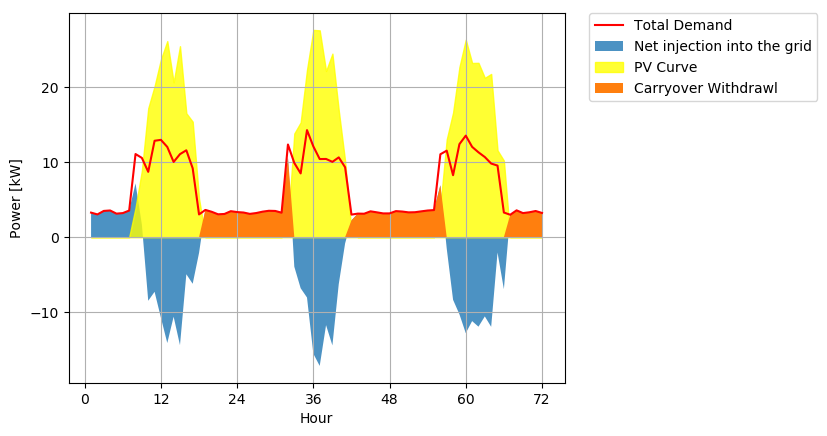

In [145]:
hours = 1:72
fill_between(hours, ts["inyection_grid_h"], label = "Net injection into the grid", alpha = 0.8)
fill_between(hours, ts["pv_curve"], label = "PV Curve", alpha = 0.8, color="yellow")
fill_between(hours, ts["withdrawl_h"],  label = "Carryover Withdrawl")
plot(hours, ts["demand_curve"], label = "Total Demand", color = "red")
legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
xlabel("Hour")
ylabel("Power [kW]")
grid("on")
xticks([0,12,24,36,48,60,72]);

In [146]:
ebalance = annual_energy_balance(commercial, PVComInd, print_output=true);

month consumer_energy PV_energy  | inyection_grid withdrawn_energy grid_energy  | peak_power peak_demand  | global_generation global_withdrawl global_allowance max_surplus carry_over 
1 5013.18 5816.52  | 2295.86 1492.52 0.0  | 14.77 3.73  | 5816.52 1492.52 2850.09 1357.57 803.34 
2 5093.61 4291.95  | 1220.71 2022.37 0.0  | 16.81 12.51  | 10108.47 3514.89 4953.15 1438.26 1.68 
3 4864.88 4883.68  | 1890.55 1871.75 0.0  | 14.38 10.86  | 14992.14 5386.64 7346.15 1959.51 20.47 
4 5039.16 5300.6  | 1794.11 1532.68 0.0  | 15.46 5.11  | 20292.74 6919.32 9943.44 3024.12 281.91 
5 5352.18 5446.29  | 2037.95 1943.84 0.0  | 15.86 7.38  | 25739.03 8863.17 12612.12 3748.96 376.01 
6 5209.01 5317.53  | 1737.9 1629.38 0.0  | 15.89 4.54  | 31056.55 10492.55 15217.71 4725.16 484.53 
7 4964.02 5414.09  | 2061.59 1611.52 0.0  | 14.75 4.56  | 36470.64 12104.07 17870.62 5766.54 934.6 
8 5048.07 5536.16  | 2105.76 1617.66 0.0  | 14.97 5.15  | 42006.81 13721.73 20583.34 6861.6 1422.69 
9 4933.69 5694.55  | 2

In [147]:
bills_commercial = Dict()
println("grid_cost"," ","withdrawn_energy_cost"," ", "total_energy_cost", " ", "total_demand_charges", " | ", 
        "counterfactual_energy_cost", " ", "counterfactual_demand_cost", " ", "counterfactual_cost", " ", " | ", "savings")
for m in 1:12
    bills_commercial[m] = monthly_bill(ebalance[m], commercial, print_output=true)
end

grid_cost withdrawn_energy_cost total_energy_cost total_demand_charges | counterfactual_energy_cost counterfactual_demand_cost counterfactual_cost  | savings
0.0 31387.79 31387.79 0.0  | 321946.52 148459.64 470406.16  | 433230.32
0.0 42530.38 42530.38 0.0  | 327111.38 169023.66 496135.05  | 445761.88
0.0 39362.9 39362.9 0.0  | 312422.66 144541.65 456964.31  | 410342.71
0.0 32232.27 32232.27 0.0  | 323615.06 155423.02 479038.08  | 440862.04
0.0 40879.06 40879.06 0.0  | 343717.08 159458.27 503175.35  | 454758.02
0.0 34265.93 34265.93 0.0  | 334522.81 159790.43 494313.24  | 453728.51
0.0 33890.32 33890.32 0.0  | 318789.32 148242.06 467031.38  | 426891.53
0.0 34019.4 34019.4 0.0  | 324186.88 150503.69 474690.57  | 434397.85
0.0 31419.54 31419.54 0.0  | 316841.73 152168.94 469010.67  | 431797.23
0.0 32002.92 32002.92 0.0  | 304643.72 142602.88 447246.6  | 409342.2
0.0 33966.34 33966.34 0.0  | 318360.63 152784.26 471144.89  | 430915.01
0.0 29782.59 29782.59 0.0  | 310065.72 145083.35 455149.

# Medium Voltage (TMT) cases, users are medium to large industrial consumers.

## TMT case 1: small PV system

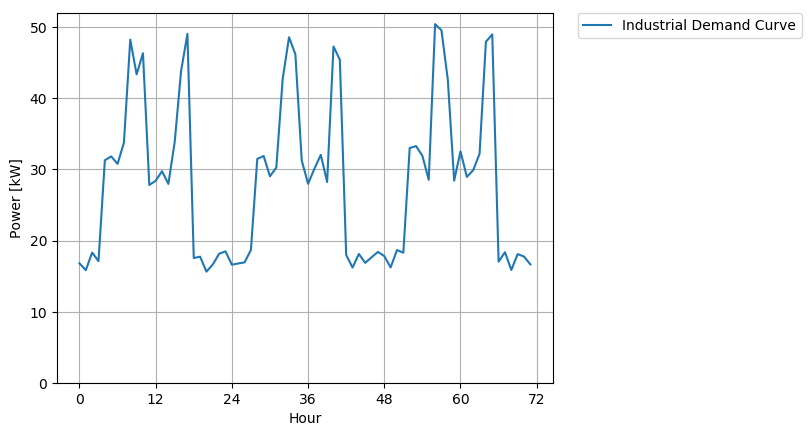

In [148]:
ts=simulate(mediumvoltage, PVTMT, 3);
plot(ts["demand_curve"], label = "Industrial Demand Curve")
legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ylim(0,52)
xlabel("Hour")
ylabel("Power [kW]")
grid("on")
xticks([0,12,24,36,48,60,72]);

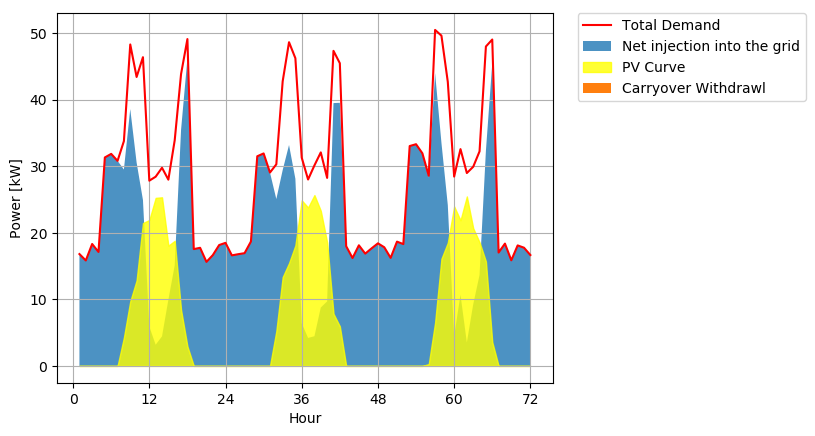

In [149]:
hours = 1:72
fill_between(hours, ts["inyection_grid_h"], label = "Net injection into the grid", alpha = 0.8)
fill_between(hours, ts["pv_curve"], label = "PV Curve", alpha = 0.8, color="yellow")
fill_between(hours, ts["withdrawl_h"],  label = "Carryover Withdrawl")
plot(hours, ts["demand_curve"], label = "Total Demand", color = "red")
legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
xlabel("Hour")
ylabel("Power [kW]")
grid("on")
xticks([0,12,24,36,48,60,72]);

In [150]:
ebalance = annual_energy_balance(mediumvoltage, PVTMT, print_output=true);

month | consumer_energy_peak consumer_energy_valley consumer_energy_night  | PV_energy inyection_grid withdrawn_energy  | grid_energy_peak grid_energy_valley grid_energy_night  | peak_power_peak peak_power_valley peak_power_night  | peak_demand_peak peak_demand_valley peak_demand_night  | global_generation global_withdrawl global_allowance max_surplus carry_over
1 | 7198.25 8054.41 5729.19  | 6056.03 0.0 0.0  | 4686.45 4510.18 5729.19  | 50.79 50.58 33.86  | 49.39 34.58 33.86  | 6056.03 0.0 2967.46 2967.46 0.0 
2 | 6575.7 7424.03 5263.82  | 3945.37 0.0 0.0  | 4761.95 5292.4 5263.82  | 51.65 50.97 34.41  | 51.43 35.91 34.41  | 10001.41 0.0 4900.69 4900.69 0.0 
3 | 7201.01 8127.45 5764.5  | 4662.04 0.0 0.0  | 5248.99 5417.42 5764.5  | 50.6 50.85 33.72  | 50.42 35.68 33.72  | 14663.45 0.0 7185.09 7185.09 0.0 
4 | 7440.31 8393.07 5916.52  | 4869.52 0.0 0.0  | 5318.3 5645.56 5916.52  | 54.33 53.91 36.13  | 54.07 36.07 36.13  | 19532.97 0.0 9571.16 9571.16 0.0 
5 | 7201.03 8049.93 5720.9  | 

In [151]:
bills_TMT= Dict()
println("grid_energy_cost_peak", " ",    
        "grid_energy_cost_valley", " ",
        "grid_energy_cost_night", " ", 
        " | ",
        "withdrawn_energy_cost", " ",       
        " | ",      
        "counterfactual_energy_cost_peak", " ",
        "counterfactual_energy_cost_valley"," ",
        "counterfactual_energy_cost_night"," ",        
         " | ",
        "grid_demand_cost_peak", " ",    
        "grid_demand_cost_valley", " ",
        "grid_demand_cost_night", " ", 
        " | ",  
        "counterfactual_demand_cost_peak", " ",
        "counterfactual_demand_cost_valley"," ",
        "counterfactual_demand_cost_night"," ",        
         " | ",
        "total_savings")
for m in 1:12
    bills_TMT[m] = monthly_bill(ebalance[m], mediumvoltage, print_output=true)
end

grid_energy_cost_peak grid_energy_cost_valley grid_energy_cost_night  | withdrawn_energy_cost  | counterfactual_energy_cost_peak counterfactual_energy_cost_valley counterfactual_energy_cost_night  | grid_demand_cost_peak grid_demand_cost_valley grid_demand_cost_night  | counterfactual_demand_cost_peak counterfactual_demand_cost_valley counterfactual_demand_cost_night  | total_savings
255036.51 122722.11 112234.93  | 0.0  | 391728.74 219160.62 112234.93  | 471344.09 234778.07 145950.43  | 484647.99 343437.67 145950.43  | 428727.31 
259145.16 144006.3 103118.3  | 0.0  | 357849.5 202007.78 103118.3  | 490825.89 243798.77 148339.6  | 492867.49 346119.49 148339.6  | 313423.96 
285650.09 147407.96 112926.51  | 0.0  | 391878.75 221147.83 112926.51  | 481127.87 242250.81 145338.97  | 482873.82 345261.8 145338.97  | 343086.25 
289421.87 153615.6 115904.61  | 0.0  | 404901.48 228375.53 115904.61  | 515983.81 244928.43 155733.86  | 518466.62 366016.33 155733.86  | 377189.3 
276040.01 141649.33 11

## TMT Case2: Medium PV System

In [152]:
PVTMT.capacity = 75
ts=simulate(mediumvoltage, PVTMT, 3);

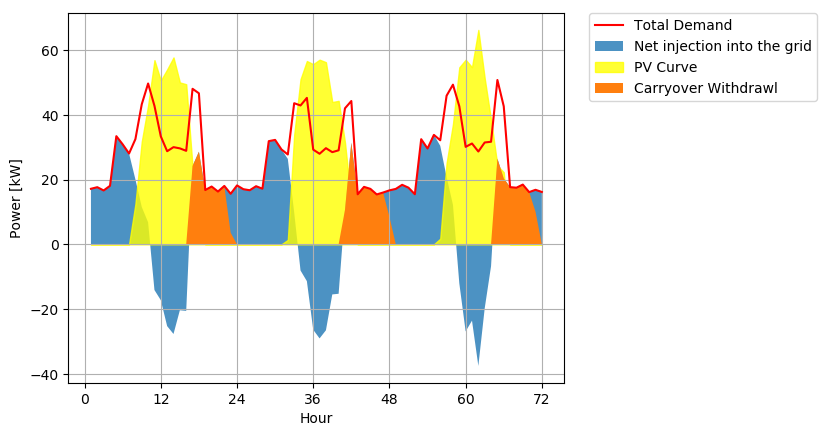

In [153]:
hours = 1:72
fill_between(hours, ts["inyection_grid_h"], label = "Net injection into the grid", alpha = 0.8)
fill_between(hours, ts["pv_curve"], label = "PV Curve", alpha = 0.8, color="yellow")
fill_between(hours, ts["withdrawl_h"],  label = "Carryover Withdrawl")
plot(hours, ts["demand_curve"], label = "Total Demand", color = "red")
legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
xlabel("Hour")
ylabel("Power [kW]")
grid("on")
xticks([0,12,24,36,48,60,72]);

In [154]:
ebalance = annual_energy_balance(mediumvoltage, PVTMT, print_output=true);

month | consumer_energy_peak consumer_energy_valley consumer_energy_night  | PV_energy inyection_grid withdrawn_energy  | grid_energy_peak grid_energy_valley grid_energy_night  | peak_power_peak peak_power_valley peak_power_night  | peak_demand_peak peak_demand_valley peak_demand_night  | global_generation global_withdrawl global_allowance max_surplus carry_over
1 | 7215.43 8115.79 5705.26  | 14379.02 3640.52 3640.52  | 0.0 1795.34 4862.11  | 50.73 50.57 33.67  | 50.73 33.8 33.67  | 14379.02 3640.52 7045.72 3405.2 0.0 
2 | 6656.95 7426.41 5275.84  | 9759.32 1358.69 1358.69  | 2266.83 2057.21 5275.84  | 51.65 51.28 34.25  | 51.32 34.39 34.25  | 24138.35 4999.21 11827.79 6828.58 0.0 
3 | 7181.43 8118.46 5744.01  | 9975.37 1370.11 1370.11  | 2810.21 2514.31 5744.01  | 50.74 50.64 33.8  | 50.61 33.63 33.8  | 34113.71 6369.32 16715.72 10346.4 0.0 
4 | 7442.8 8403.79 5929.18  | 12349.06 2240.99 2240.99  | 1367.33 2130.2 5929.18  | 54.33 52.66 35.99  | 54.1 36.07 35.99  | 46462.78 8610.32 227

In [155]:
bills_TMT= Dict()
println("grid_energy_cost_peak", " ",    
        "grid_energy_cost_valley", " ",
        "grid_energy_cost_night", " ", 
        " | ",
        "withdrawn_energy_cost", " ",       
        " | ",      
        "counterfactual_energy_cost_peak", " ",
        "counterfactual_energy_cost_valley"," ",
        "counterfactual_energy_cost_night"," ",        
         " | ",
        "grid_demand_cost_peak", " ",    
        "grid_demand_cost_valley", " ",
        "grid_demand_cost_night", " ", 
        " | ",  
        "counterfactual_demand_cost_peak", " ",
        "counterfactual_demand_cost_valley"," ",
        "counterfactual_demand_cost_night"," ",        
         " | ",
        "total_savings")
for m in 1:12
    bills_TMT[m] = monthly_bill(ebalance[m], mediumvoltage, print_output=true)
end

grid_energy_cost_peak grid_energy_cost_valley grid_energy_cost_night  | withdrawn_energy_cost  | counterfactual_energy_cost_peak counterfactual_energy_cost_valley counterfactual_energy_cost_night  | grid_demand_cost_peak grid_demand_cost_valley grid_demand_cost_night  | counterfactual_demand_cost_peak counterfactual_demand_cost_valley counterfactual_demand_cost_night  | total_savings
0.0 48851.27 95248.74  | 76560.1  | 392663.51 220830.73 111765.98  | 484060.01 229524.78 145150.71  | 484060.01 343362.57 145150.71  | 821084.34 
123360.91 55976.64 103353.63  | 28573.36  | 362271.35 202072.63 103353.63  | 489717.15 233520.96 147614.71  | 492891.46 348176.56 147614.71  | 601221.84 
152931.81 68414.39 112525.17  | 28813.42  | 390813.4 220903.3 112525.17  | 482924.62 228375.33 145693.93  | 484203.25 343873.72 145693.93  | 606842.92 
74410.0 57962.8 116152.71  | 47128.07  | 405037.3 228667.14 116152.71  | 516270.63 244889.28 155121.07  | 518489.86 357538.38 155121.07  | 733878.19 
33473.82 51

## TMT Case 3: Large PV System

In [156]:
PVTMT.capacity = 150
ts=simulate(mediumvoltage, PVTMT, 3);

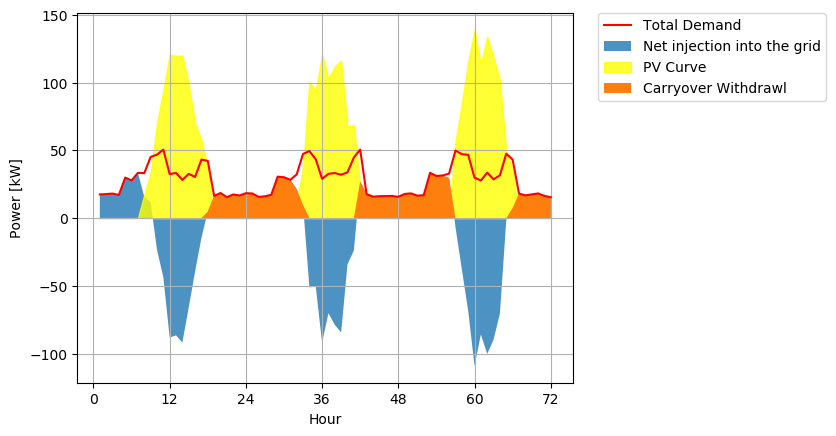

In [157]:
hours = 1:72
fill_between(hours, ts["inyection_grid_h"], label = "Net injection into the grid", alpha = 0.8)
fill_between(hours, ts["pv_curve"], label = "PV Curve", alpha = 0.8, color="yellow")
fill_between(hours, ts["withdrawl_h"],  label = "Carryover Withdrawl")
plot(hours, ts["demand_curve"], label = "Total Demand", color = "red")
legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
xlabel("Hour")
ylabel("Power [kW]")
grid("on")
xticks([0,12,24,36,48,60,72]);

In [158]:
ebalance = annual_energy_balance(mediumvoltage, PVTMT, print_output=true);

month | consumer_energy_peak consumer_energy_valley consumer_energy_night  | PV_energy inyection_grid withdrawn_energy  | grid_energy_peak grid_energy_valley grid_energy_night  | peak_power_peak peak_power_valley peak_power_night  | peak_demand_peak peak_demand_valley peak_demand_night  | global_generation global_withdrawl global_allowance max_surplus carry_over
1 | 7318.52 8143.03 5698.5  | 27681.03 16052.75 9531.76  | 0.0 29.22 0.0  | 50.76 50.77 33.14  | 50.63 33.79 33.14  | 27681.03 9531.76 13563.7 4031.94 4031.94 
2 | 6613.26 7506.0 5266.72  | 20190.69 10092.8 9288.09  | 0.0 0.0 0.0  | 51.56 51.52 34.13  | 51.56 34.25 34.13  | 47871.72 18819.86 23457.14 4637.29 4637.29 
3 | 7239.21 8103.58 5726.49  | 21139.8 10638.04 10567.52  | 0.0 0.0 0.0  | 50.82 50.85 33.84  | 50.74 33.82 33.84  | 69011.52 29387.38 33815.64 4428.27 4428.27 
4 | 7503.28 8414.65 5961.44  | 24487.64 13052.72 10444.45  | 0.0 0.0 0.0  | 54.32 53.94 36.25  | 54.32 35.6 36.25  | 93499.16 39831.83 45814.59 5982.76 598

In [159]:
bills_TMT= Dict()
println("grid_energy_cost_peak", " ",    
        "grid_energy_cost_valley", " ",
        "grid_energy_cost_night", " ", 
        " | ",
        "withdrawn_energy_cost", " ",       
        " | ",      
        "counterfactual_energy_cost_peak", " ",
        "counterfactual_energy_cost_valley"," ",
        "counterfactual_energy_cost_night"," ",        
         " | ",
        "grid_demand_cost_peak", " ",    
        "grid_demand_cost_valley", " ",
        "grid_demand_cost_night", " ", 
        " | ",  
        "counterfactual_demand_cost_peak", " ",
        "counterfactual_demand_cost_valley"," ",
        "counterfactual_demand_cost_night"," ",        
         " | ",
        "total_savings")
for m in 1:12
    bills_TMT[m] = monthly_bill(ebalance[m], mediumvoltage, print_output=true)
end

grid_energy_cost_peak grid_energy_cost_valley grid_energy_cost_night  | withdrawn_energy_cost  | counterfactual_energy_cost_peak counterfactual_energy_cost_valley counterfactual_energy_cost_night  | grid_demand_cost_peak grid_demand_cost_valley grid_demand_cost_night  | counterfactual_demand_cost_peak counterfactual_demand_cost_valley counterfactual_demand_cost_night  | total_savings
0.0 795.07 0.0  | 200452.98  | 398273.69 221571.93 111633.58  | 483182.58 229437.71 142859.5  | 484437.69 344733.03 142859.5  | 975949.95 
0.0 0.0 0.0  | 195328.57  | 359893.88 204238.31 103174.97  | 491980.25 232537.46 147117.88  | 491980.25 349813.06 147117.88  | 899732.87 
0.0 0.0 0.0  | 222234.95  | 393957.85 220498.31 112181.93  | 484241.5 229648.42 145848.13  | 484957.42 345261.64 145848.13  | 963184.95 
0.0 0.0 0.0  | 219646.85  | 408328.29 228962.75 116784.62  | 518392.51 241703.79 156238.41  | 518392.51 366223.47 156238.41  | 1.00782086e6 
0.0 0.0 0.0  | 207497.83  | 390296.21 221257.3 111657.95  